In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from logistic import LogisticRegression, GradientDescentOptimizer, NewtonOptimizer
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

In [4]:
# from perceptron lecture

def plot_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [5]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

In [6]:
# plots the first and last 5 iterations of the decision boundary
def plot_decisions(X, y, weight_vec, loss_vec):
        # set up the figure
        current_ax = 0
        plt.rcParams["figure.figsize"] = (10, 8)
        fig, axarr = plt.subplots(2, 5, sharex = True, sharey = True)

        # iter through weight_vec

        for i in range(5):
                ax = axarr.ravel()[current_ax]
                plot_data(X, y, ax)
                draw_line(weight_vec[i], x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
                draw_line(weight_vec[i+1], x_min = -1, x_max = 2, ax = ax, color = "black")
                ax.set_title(f"loss = {loss_vec[i]:.3f}")
                ax.set(xlim = (-1, 2), ylim = (-1, 2))
                current_ax += 1
        
        for i in range(len(weight_vec) - 6, len(weight_vec) - 1):
                ax = axarr.ravel()[current_ax]
                plot_data(X, y, ax)
                draw_line(weight_vec[i], x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
                draw_line(weight_vec[i+1], x_min = -1, x_max = 2, ax = ax, color = "black")
                ax.set_title(f"loss = {loss_vec[i]:.3f}")
                ax.set(xlim = (-1, 2), ylim = (-1, 2))
                current_ax += 1
        fig.suptitle("LR Decision Boundaries over Time")

In [7]:
def plot_loss(loss_vec):
    plt.plot(loss_vec, color = "slategrey")
    plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
    labs = plt.gca().set(xlabel = "LR Iteration (Updates Only)", ylabel = "loss")
    plt.title("LR Loss Iterations over Time")

In [8]:
def train_LR_Grad(X, y, alpha, beta, num_steps=100): 
    LR = LogisticRegression() 
    opt = GradientDescentOptimizer(LR)

    # initialize for main loop
    loss = 1
    loss_vec = []
    weight_vec = [torch.rand(X.size()[1])]

    for _ in range(num_steps):
        prev_loss = loss
        loss = LR.loss(X, y)

        opt.step(X, y, alpha, beta)

        if (prev_loss != loss):
            loss_vec.append(loss)
            weight_vec.append(LR.w)
        if (loss == 0):
            break
    return LR, (loss_vec, weight_vec)

In [9]:
def train_LR_Newton(X, y, alpha, num_steps=100): 
    LR = LogisticRegression() 
    opt = NewtonOptimizer(LR)

    # initialize for main loop
    loss = 1
    loss_vec = []
    weight_vec = [torch.rand(X.size()[1])]

    for _ in range(num_steps):
        prev_loss = loss
        loss = LR.loss(X, y)

        opt.step(X, y, alpha)

        if (prev_loss != loss):
            loss_vec.append(loss)
            weight_vec.append(LR.w)
        if (loss == 0):
            break
    return LR, (loss_vec, weight_vec)

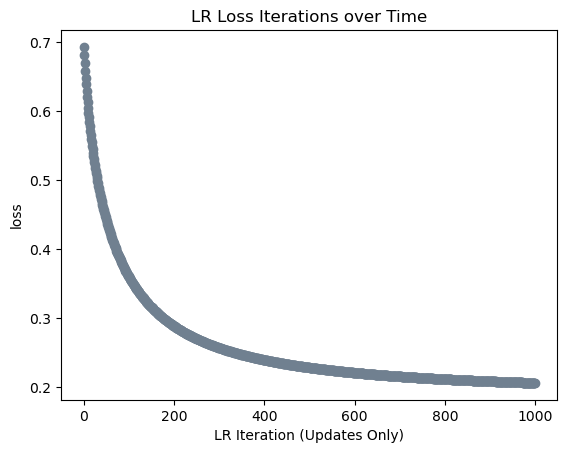

In [36]:
LR_grad, (loss_vec_grad, weight_vec_grad) = train_LR_Grad(X, y, 0.1, 0, 1000)
LR_new, (loss_vec_new, weight_vec_new) = train_LR_Newton(X, y, 100, 1000)
plot_loss(loss_vec_grad)

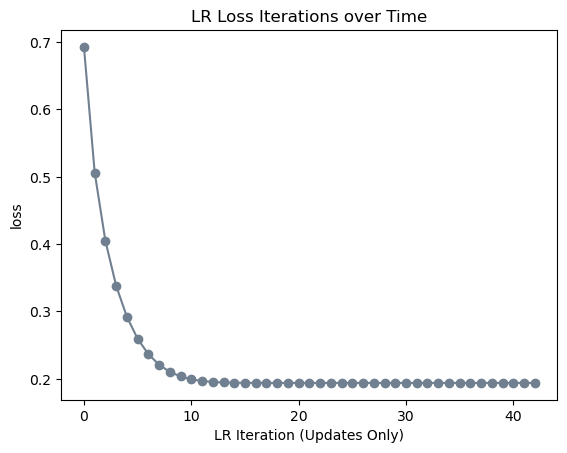

In [37]:
plot_loss(loss_vec_new)

^ 1 and 2 experiments (separate out)

3:

In [41]:
LR_new, (loss_vec_new, weight_vec_new) = train_LR_Newton(X, y, 1000, 100)

_LinAlgError: linalg.inv: The diagonal element 1 is zero, the inversion could not be completed because the input matrix is singular.